In [46]:
import numpy as np
from matplotlib import pyplot as plt
from hypergraph import opt
# plt.style.use('dark_background')

In [47]:
w = np.loadtxt('throughput/contact-high-school/w.txt')
x = np.loadtxt('throughput/contact-high-school/x.txt')
w2 = np.loadtxt('throughput/contact-high-school/w2.txt')

In [48]:
d = np.round(w.sum(axis = 0).astype(int))
b = x.sum(axis = 0)
n = len(d)
b_ = opt.compute_b(d)

round 0, current error = 13333.8657
round 1, current error = 6567.913
round 2, current error = 918.7978
round 3, current error = 245.6526
round 4, current error = 0.2681
round 5, current error = 0.0224
round 6, current error = 0.0175


In [49]:
def degree_sort(A, d = d):
    row_sorted = A[np.argsort(d)]
    col_sorted = row_sorted[:, np.argsort(d)]
    return(col_sorted)

In [50]:
def W_from_b(b):
    y = 0.5*b.sum()
    BB = np.outer(b, b)
    np.fill_diagonal(BB, 0)
    W = BB / (2*y - BB)
    return(W)

def X_from_b(b):
    y = 0.5*b.sum()
    BB = np.outer(b, b)
    np.fill_diagonal(BB, 0)
    return(BB/(2*y))

/home/phil/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/phil/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/phil/.local/lib/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/home/phil/.local/lib/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


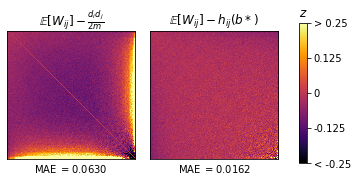

In [60]:
vmin = -.25
vmax = .25
cmap = 'inferno'

sig = np.sqrt(w2 - w**2)
sig

fig = plt.figure(figsize = (5, 2.5))
ax1 = fig.add_subplot(121)

CL = np.outer(d, d)/d.sum()
np.fill_diagonal(CL, 0)

err = (CL - w)
v = np.mean(np.abs(err))

to_plot = degree_sort(err/sig)
to_plot[np.isinf(to_plot)] = 0
to_plot[np.isnan(to_plot)] = 0
im = ax1.imshow(to_plot, cmap = cmap, vmin = vmin, vmax = vmax)

description = r"$\mathbb{E}[W_{ij}] - \frac{d_id_j}{2m}$"
err = r"MAE $ = $" + "{:05.4F}".format(v)
ax1.set(title = description,
        xlabel = err)

ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    right=False,
    left=False,
    labelbottom=False,
    labelleft=False,
    length = 0)

ax3 = fig.add_subplot(122)


W_ = W_from_b(b_)
err = (W_ - w) 
np.fill_diagonal(err, 0)
err[np.isinf(err)] = 0
v = np.nanmean(np.abs(err))

to_plot = degree_sort(err/sig)
to_plot[np.isinf(to_plot)] = 0
to_plot[np.isnan(to_plot)] = 0
im = ax3.imshow(to_plot, cmap = cmap, vmin = vmin, vmax = vmax)

# im = ax3.imshow(degree_sort(err), cmap = cmap, vmin = vmin, vmax = vmax)


description = r"$\mathbb{E}[W_{ij}] - h_{ij}(b*)$"
err = r"MAE $ = $" + "{:05.4F}".format(v)

ax3.set(title = description,
        xlabel = err)

ax3.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    right=False,
    left=False,
    labelbottom=False,
    labelleft=False,
    length = 0)

plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.78])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[vmin, vmin/2, 0, vmax/2, vmax])

cbar.ax.set_yticklabels(['< ' + str(vmin), str(vmin/2), '0' , str(vmax/2), '> ' + str(vmax)])  # vertically oriented colorbar
cbar_ax.set(title = r'$z$')

plt.savefig('../../Downloads/error_matrices.png', dpi=300)

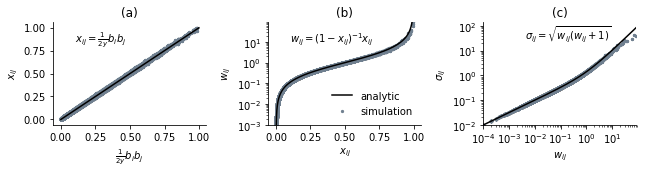

In [57]:
fig = plt.figure(figsize = (9, 2.5))

linewidth = 1.5
alpha = 1



# first plot

ax1 = fig.add_subplot(131)
CL_ = X_from_b(b_)
ax1.scatter(CL_.ravel(),
            x.ravel(), 
            s = 5,
            label = 'simulation', 
            color = 'slategrey', 
            alpha = alpha)
ax1.plot([0, x.max()], [0, x.max()], color = 'black', label = 'analytic', linewidth = linewidth)

ax1.set(xlabel = r'$\frac{1}{2y}b_ib_j$', 
        ylabel = r'$x_{ij}$', 
        title = '(a)')


# ax1.text(.5, .25, r'$x_{ij} = \frac{b_ib_j}{2y}$')
ax1.text(.1, .85, r'$x_{ij} = \frac{1}{2y}b_ib_j$')

# second plot: w_{ij} vs. x_{ij}

ax2 = fig.add_subplot(132)
ax2.scatter(x.ravel(), 
           w.ravel(), 
           s = 5, 
           label = 'simulation', 
           color = 'slategrey', 
           alpha = alpha)
ax2.semilogy()


X = np.linspace(w.min(), w.max(), 100000)
Y = X/(1+X)
ax2.plot(Y, X, color = 'black', label = 'analytic', linewidth = linewidth)

ax2.set(ylim = (w.min() + .001, w.max()),
       xlabel = r'$x_{ij}$',
       ylabel = r'$w_{ij}$', 
        title = '(b)')


# ax2.text(.35, .05, r'$w_{ij} = \frac{x_{ij}}{1-x_{ij}}$')
ax2.text(.1, 10, r'$w_{ij} = (1-x_{ij})^{-1}x_{ij}$')

# third plot: variance
ax3 = fig.add_subplot(133)
sig = np.sqrt(w2.ravel() - (w**2).ravel())
ax3.scatter(w.ravel(), 
           sig, 
           s = 5, 
           label = 'simulation', 
           color = 'slategrey', 
           alpha = alpha)
ax3.loglog()

X = np.linspace(w.min(), w.max(), 1000000)

Y = np.sqrt(X*(X+1))

ax3.plot(np.sort(X),np.sort(Y), label = 'analytic', color = 'black', linewidth = linewidth)

ax3.set(xlim = (w[w>0].min(), w.max()),
       ylim = (sig[sig>0].min(), None),
        xlabel = r'$w_{ij}$',
       ylabel = r'$\sigma_{ij}$', 
       title = '(c)')

ax3.text(.004, 30, r'$\sigma_{ij} = \sqrt{w_{ij}(w_{ij} + 1)}$')

# Fourth plot: learned parameters
# ax4 = fig.add_subplot(141)
# ax4.scatter(d, b, color = 'slategrey', label = 'simulation', s = 15)
# ax4.plot(np.sort(d), np.sort(b_), color = 'black', label = 'learned', linewidth = linewidth)

# ax4.set(xlabel = r'$d_i$', 
#         ylabel = r'$b_i$', 
#         title = '(a)')

for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

ax2.legend(loc = 'lower right', frameon=False)

plt.tight_layout()
plt.savefig('../../Downloads/validation.png', dpi=300)

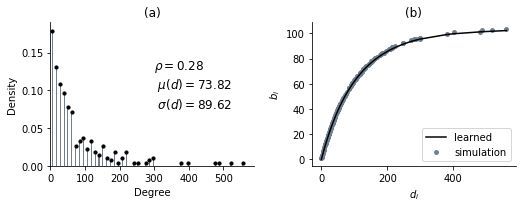

In [53]:
X, Y = np.histogram(d, bins = 50)
X = X/X.sum()
Y = Y[1:] - (Y[1] - Y[0])/2

Y = Y[X>0]
X = X[X > 0]

fig = plt.figure(figsize = (7.5, 3))
ax = fig.add_subplot(121)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.bar(Y, X, color = 'slategrey', width = 3)
ax.scatter(Y, X, color = 'black', zorder=10, s = 10)
ax.set(title = '(a)', 
       ylim = (0, None),
       xlim = (0, None),
       xlabel = "Degree", 
       ylabel = "Density")



mu = d.mean()
sigma = np.sqrt(((d**2).mean() - d.mean()**2))
density = d.sum() / (n*(n-1))

ax.text(300, .08, 
        r'$\rho = $' + str(round(density, 2)) + '\n' +  r' $\mu(d) = $' + str(round(mu, 2)) + '\n' + r' $\sigma(d) = $' + str(round(sigma,2)),
        fontsize = 12)

ax2 = fig.add_subplot(122)


ax2.scatter(d, b, color = 'slategrey', label = 'simulation', s = 15)
ax2.plot(np.sort(d), np.sort(b_), color = 'black', label = 'learned', linewidth = linewidth)

ax2.set(xlabel = r'$d_i$', 
        ylabel = r'$b_i$', 
        title = '(b)')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend(loc = 'lower right')

plt.tight_layout()

plt.savefig('../../Downloads/degree_distribution.png', dpi=300)